<a href="https://colab.research.google.com/github/Helm110/ASTRON-1221/blob/main/transit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as ac
import astropy.io.ascii

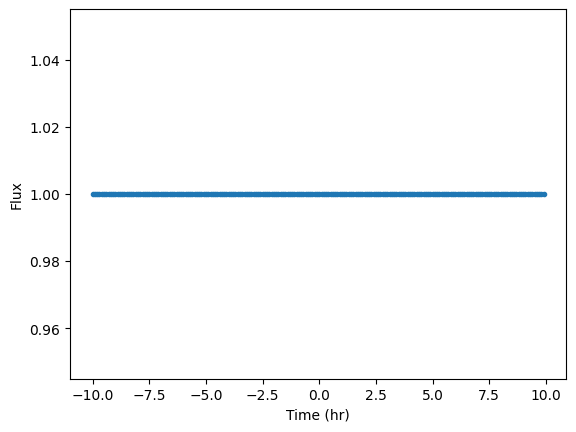

In [2]:
#Creating a basic model displaying the flux of a star
time_arr = np.arange(-10,10,0.1) * u.hour
flux_arr = np.zeros(np.shape(time_arr)) + 1.0
#Ploting the results
plt.plot(time_arr, flux_arr, linestyle = "--", marker = ".")
plt.xlabel("Time (hr)")
plt.ylabel("Flux")
#Showing plot
plt.show()

In [3]:
#Creating the cross over of the exoplanet
tau = 2.0*u.hour
t0 = 1.0*u.hour
time_start = t0 - tau / 2
time_end = t0 + tau / 2
print(time_start, time_end)

0.0 h 2.0 h


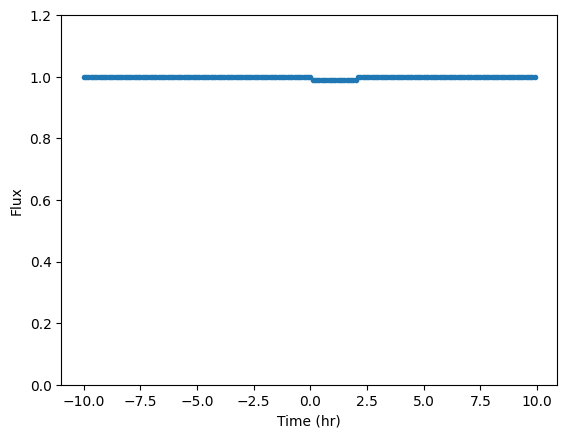

In [4]:
#Defining where the flux drop would occur
ind = np.where((time_arr >= time_start) & (time_arr <= time_end))
delta = .01
flux_arr[ind] = 1 - delta
#Printing the findings
plt.plot(time_arr, flux_arr, linestyle = "--", marker = ".")
plt.xlabel("Time (hr)")
plt.ylabel("Flux")
plt.ylim(0,1.2)
#Displaying the graph
plt.show()

In [5]:
#Creating the shape of a light curve
def generate_transit_lightcurve(time_arr, t0, tau, delta):
  flux_arr = np.zeros(np.shape(time_arr)) + 1.0
  time_start = t0 - tau / 2
  time_end = t0 + tau / 2
  ind = np.where((time_arr >= time_start) & (time_arr <= time_end))
  flux_arr[ind] = 1 - delta
  return flux_arr

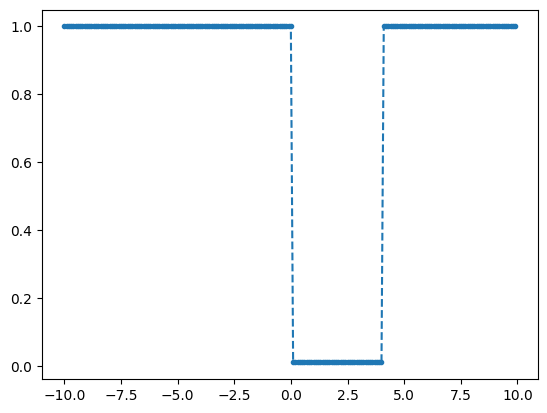

In [6]:
#Defining parameters of the time curve
time_arr = np.arange(-10,10,0.1) * u.hour
tau = 4.0 * u.hour
t0 = 2.0 * u.hour
delta = .99
flux_arr = generate_transit_lightcurve(time_arr, t0, tau, delta)
#Ploting the light curve
plt.plot(time_arr, flux_arr, linestyle = "--", marker = ".")

In [7]:
#Import the data
from google.colab import files
uploaded = files.upload()

Saving gj436b.tbl to gj436b.tbl


In [8]:
#Saving the data in a variable
dat = astropy.io.ascii.read("gj436b.tbl")

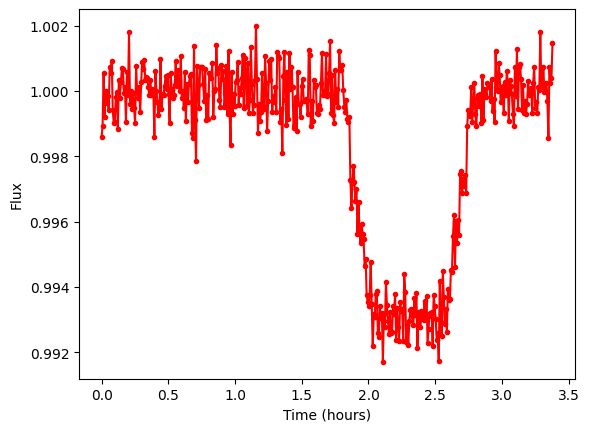

In [9]:
#Creating a graph with error bars
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24 * u.hour
flux_obs = dat["Relative_Flux"]
#Plotting the different aspects of the graph
plt.plot(time_obs, flux_obs, marker= ".", color = "red")
plt.xlabel("Time (hours)")
plt.ylabel("Flux")
plt.show()


In [10]:
#Creating the variables to make a model
t0 = 2.3 * u.hour
tau = .9 * u.hour
delta = .007
flux_model = generate_transit_lightcurve(time_obs, t0, tau, delta)


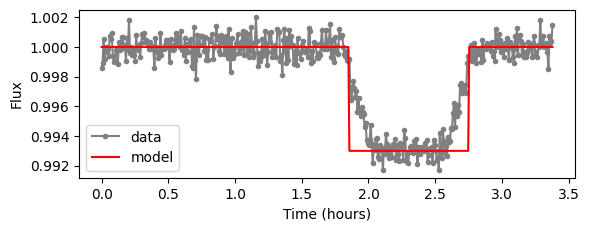

In [11]:
#Ploting the model in comparision to the data
plt.subplot(2, 1, 1)
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24 * u.hour
flux_obs = dat["Relative_Flux"]
plt.plot(time_obs, flux_obs, marker= ".", color = "gray", label="data")
plt.plot(time_obs, flux_model, linestyle = "-", color = "red", label="model")
plt.xlabel("Time (hours)")
plt.ylabel("Flux")
plt.legend()
plt.show()


In [12]:
#Chi Value of Parameter set 1
ind = np.where(time_obs < 1.5 * u.hour) # where there is not transit but has fluctuation
error = np.std(flux_obs[ind])

#Calculates the Chi squared of this model
Deg_Freedom = len(time_obs) - 3
reduced_chi1 = np.sum(((flux_obs - flux_model)/error)**2) / Deg_Freedom
print(reduced_chi1)

2.878233593260228


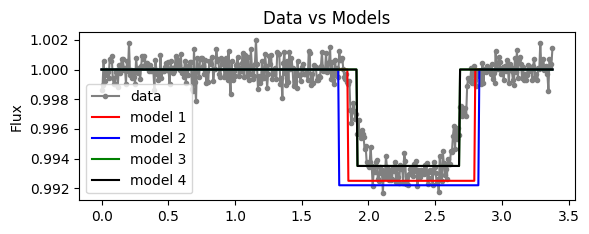

In [27]:
#Creating additional approximates
t02 = 2.3 * u.hour
tau2 = 1.05 * u.hour
delta2 = .0078
flux_model2 = generate_transit_lightcurve(time_obs, t02, tau2, delta2)

#Model 3
t03 = 2.3 * u.hour
tau3 = .86 * u.hour
delta3 = .0062
flux_model3 = generate_transit_lightcurve(time_obs, t03, tau3, delta3)

#Model 4 Over all best fit (determined later in code)
t04 = 2.3 * u.hour
tau4 = .764 * u.hour
delta4 = .0065
flux_model4 = generate_transit_lightcurve(time_obs, t04, tau4, delta4)


#Plot comparing the models and data
plt.subplot(2, 1, 1)
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24 * u.hour
flux_obs = dat["Relative_Flux"]
plt.plot(time_obs, flux_obs, marker= ".", color = "gray", label="data")
plt.plot(time_obs, flux_model, linestyle = "-", color = "red", label="model 1")
plt.plot(time_obs, flux_model2, linestyle = "-", color = "blue", label="model 2")
plt.plot(time_obs, flux_model4, linestyle = "-", color = "green", label="model 3")
plt.plot(time_obs, flux_model4, linestyle = "-", color = "black", label="model 4")
plt.ylabel("Flux")
plt.title("Data vs Models")
plt.legend()
plt.show()


In [24]:
#Chi Value of Parameter set 1
ind = np.where(time_obs < 1.5 * u.hour) # where there is not transit but has fluctuation
error = np.std(flux_obs[ind])

Deg_Freedom = len(time_obs) - 3
reduced_chi1 = np.sum(((flux_obs - flux_model)/error)**2) / Deg_Freedom
print(reduced_chi1)

#Chi Value of Parameter set 2 (Over estimate)

Deg_Freedom = len(time_obs) - 3
reduced_chi2 = np.sum(((flux_obs - flux_model2)/error)**2) / Deg_Freedom
print(reduced_chi2)

#Chi Value of Parameter set 3 (Over estimate)

Deg_Freedom = len(time_obs) - 3
reduced_chi3 = np.sum(((flux_obs - flux_model3)/error)**2) / Deg_Freedom
print(reduced_chi3)


Deg_Freedom = len(time_obs) - 3
reduced_chi4 = np.sum(((flux_obs - flux_model4)/error)**2) / Deg_Freedom
print(reduced_chi4)

5.09077027644071
9.16234929667041
1.8922124267393983
1.696425044467631


In [21]:
#Quick algorithm to run through all options to find the best fit
best_chi2 = np.inf  # Initialize with a very large value
best_params = {2.3,.764,.0064999999}  # Dictionary to store best parameters

#Creating scanning ranges
t0_range = np.arange(2.25, 2.35, 0.01) * u.hour  # Range of t0 values
tau_range = np.arange(0.7, .95, 0.001) * u.hour  # Range of tau values
delta_range = np.arange(0.005, 0.008, 0.0005)  # Range of delta values

#Looping through all posibilities in the range of interest
for t0 in t0_range:
    for tau in tau_range:
        for delta in delta_range:
            flux_model = generate_transit_lightcurve(time_obs, t0, tau, delta)

            # Calculate chi-squared
            ind = np.where(time_obs < 1.5 * u.hour)
            error = np.std(flux_obs[ind])
            chi3 =  np.sum(((flux_obs - flux_model)/error)**2) / Deg_Freedom

            # Update best parameters if chi-squared is less than current best_chi2
            if chi2 < best_chi2:  # Comparing directly with chi2
                best_chi2 = chi2
                best_params = {'t0': t0, 'tau': tau, 'delta': delta}

#Print results
print("Best-fit parameters:", best_params)
print("Best chi-squared:", best_chi2) # Print the best chi-squared

Best-fit parameters: {'t0': <Quantity 2.3 h>, 'tau': <Quantity 0.764 h>, 'delta': 0.006499999999999999}
Best chi-squared: inf
